# 实验三

用python编程实现三种情况的傅里叶反变换，比较复原图像的区别，理解傅里叶变换后的幅度谱和相位谱。

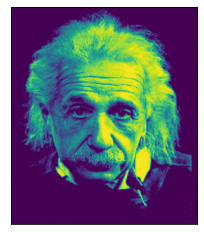

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('greygraph.png',0)
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()

[[[-9.53674316e-06  2.77000000e+02]
  [ 1.05696732e+02 -1.61177124e+02]
  [-2.19345734e+02 -2.28938766e+02]
  ...
  [ 2.97203125e+02 -9.97036285e+01]
  [ 2.19345734e+02 -2.28938766e+02]
  [-1.05696732e+02 -1.61177124e+02]]

 [[-2.42832214e+02  2.16648483e+01]
  [ 1.37574646e+02  1.27894211e+02]
  [-1.02838165e+02 -5.47674561e+01]
  ...
  [ 2.22614746e+02  1.09054718e+01]
  [ 2.26170807e+01 -8.30680542e+01]
  [ 9.77585983e+00 -2.12045364e+01]]

 [[ 4.34869652e+01  3.98440666e+01]
  [-7.58295288e+01  1.10551193e+02]
  [ 6.48856201e+01 -7.05754242e+01]
  ...
  [-1.01020569e+02  8.77655640e+01]
  [-2.86440239e+01 -5.89096069e+01]
  [ 1.47622116e+02 -1.02666168e+02]]

 ...

 [[-9.81871338e+01 -1.05948166e+02]
  [-4.02151108e+01 -4.53279114e+01]
  [ 4.45529861e+01 -1.46637421e+02]
  ...
  [ 1.19767090e+02 -1.28636322e+02]
  [ 6.93299103e+01  1.65500870e+01]
  [ 6.73562622e+01 -1.02851868e+01]]

 [[-4.34869614e+01  3.98440742e+01]
  [-1.47622116e+02 -1.02666168e+02]
  [ 2.86440239e+01 -5.8909

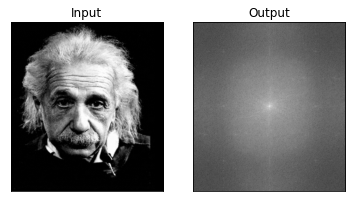

In [10]:
rows, cols = img.shape
nrows = cv.getOptimalDFTSize(rows)
ncols = cv.getOptimalDFTSize(cols)
nimg = np.zeros((nrows, ncols))
nimg[:rows, :cols] = img
img = nimg

dft=cv.dft(np.float32(img),flags=cv.DFT_COMPLEX_OUTPUT)
# print(dft)
dft_shift=np.fft.fftshift(dft) # 将函数从默认左上角移到中间
print(dft_shift)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Input')
plt.xticks([]),plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Output')
plt.xticks([]),plt.yticks([])
plt.show()